In [46]:
#import pandas librabry and numpy library
import pandas as pd
import numpy as np

# import matplotlib and seaborn library
from datetime import datetime
import matplotlib.pyplot as plt

In [47]:
# load data from csv file to dataframe
try:
    df = pd.read_csv('/Users/trieupham/Library/CloudStorage/OneDrive-BTMGlobalConsulting/Projects/data csv/prices_data_set.csv', on_bad_lines='warn')
except FileNotFoundError as e:
    print(e)
    df = pd.read_csv(r'C:\Users\Trieu Pham\OneDrive - BTM Global Consulting\Projects\data csv\prices_data_set.csv', on_bad_lines='warn')
df.dropna(inplace=True)


Skipping line 1629: expected 7 fields, saw 9
Skipping line 1829: expected 7 fields, saw 8
Skipping line 2028: expected 7 fields, saw 11
Skipping line 2161: expected 7 fields, saw 9
Skipping line 2366: expected 7 fields, saw 8
Skipping line 2501: expected 7 fields, saw 11
Skipping line 2706: expected 7 fields, saw 8
Skipping line 2913: expected 7 fields, saw 12
Skipping line 3180: expected 7 fields, saw 12
Skipping line 3315: expected 7 fields, saw 8
Skipping line 3518: expected 7 fields, saw 9
Skipping line 3653: expected 7 fields, saw 11
Skipping line 3787: expected 7 fields, saw 8
Skipping line 3925: expected 7 fields, saw 9
Skipping line 4131: expected 7 fields, saw 8
Skipping line 4405: expected 7 fields, saw 9
Skipping line 4471: expected 7 fields, saw 8
Skipping line 4879: expected 7 fields, saw 10
Skipping line 7621: expected 7 fields, saw 8
Skipping line 7711: expected 7 fields, saw 8
Skipping line 7777: expected 7 fields, saw 10
Skipping line 8247: expected 7 fields, saw 8
Ski

In [48]:
df.describe()

,Ticker,Date,Open,High,Low,Close,Volume
count,1007643,1007643,1007643,1007643,1007643,1007643,1007643
unique,463,6771,272520,270706,269587,268417,172348
top,TMS,12/31/2021 00:00:00,13,14,4,10,0
freq,5094,373,659,625,623,589,61488


In [49]:
# Convert the "Date" column to datetime format
try:
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S', errors='coerce')
except ValueError as e:
    print(f"Error: {e}")
    print(df[df['Date'].str.contains(':00') == True])

# Extract the day of week, day of month, month, and year
df['DayOfWeek'] = df['Date'].dt.day_name()
df['DayOfMonth'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


# Remove all lines have value Ticker,Date,Open,High,Low,Close,Volume
df = df[df['Ticker'] != 'Ticker']

# Remove lines with Date = NaN
df = df[df['Date'].isnull() == False]

df


,Ticker,Date,Open,High,Low,Close,Volume,DayOfWeek,DayOfMonth,Month,Year
0,AAA,2023-04-28,10.75,11,10.2,10.5,7.8449e+006,Friday,28.0,4.0,2023.0
1,AAA,2023-04-27,10.3,10.75,10.3,10.65,7.4791e+006,Thursday,27.0,4.0,2023.0
2,AAA,2023-04-26,9.42,10.15,9.4,10.15,1.26389e+007,Wednesday,26.0,4.0,2023.0
3,AAA,2023-04-25,9.57,9.67,9.37,9.49,1.8355e+006,Tuesday,25.0,4.0,2023.0
4,AAA,2023-04-24,9.59,9.7,9.47,9.58,1.7559e+006,Monday,24.0,4.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...
1013675,VTO,2007-10-16,20.7326,20.7326,20.2064,20.2064,162830,Tuesday,16.0,10.0,2007.0
1013676,VTO,2007-10-15,20.5221,21.0483,20.5221,20.7326,289380,Monday,15.0,10.0,2007.0
1013677,VTO,2007-10-12,21.6798,21.6798,21.2588,21.4693,988430,Friday,12.0,10.0,2007.0
1013678,VTO,2007-10-11,20.8378,20.8378,20.6274,20.8378,548040,Thursday,11.0,10.0,2007.0


In [50]:
# Show all data Ticker == 'AAA'
ticket_sample = df[df['Ticker'] == 'AAA']

In [51]:
ticket_sample

,Ticker,Date,Open,High,Low,Close,Volume,DayOfWeek,DayOfMonth,Month,Year
0,AAA,2023-04-28,10.75,11,10.2,10.5,7.8449e+006,Friday,28.0,4.0,2023.0
1,AAA,2023-04-27,10.3,10.75,10.3,10.65,7.4791e+006,Thursday,27.0,4.0,2023.0
2,AAA,2023-04-26,9.42,10.15,9.4,10.15,1.26389e+007,Wednesday,26.0,4.0,2023.0
3,AAA,2023-04-25,9.57,9.67,9.37,9.49,1.8355e+006,Tuesday,25.0,4.0,2023.0
4,AAA,2023-04-24,9.59,9.7,9.47,9.58,1.7559e+006,Monday,24.0,4.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...
4970,AAA,2010-07-22,9.83184,10.464,9.81004,9.83184,147200,Thursday,22.0,7.0,2010.0
4971,AAA,2010-07-21,9.85364,9.89724,9.59204,9.83184,75800,Wednesday,21.0,7.0,2010.0
4972,AAA,2010-07-20,10.464,10.464,9.70104,9.85364,328700,Tuesday,20.0,7.0,2010.0
4973,AAA,2010-07-19,10.791,10.791,10.0934,10.0934,104900,Monday,19.0,7.0,2010.0


/usr/local/anaconda3/envs/myenv/lib/python3.11/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


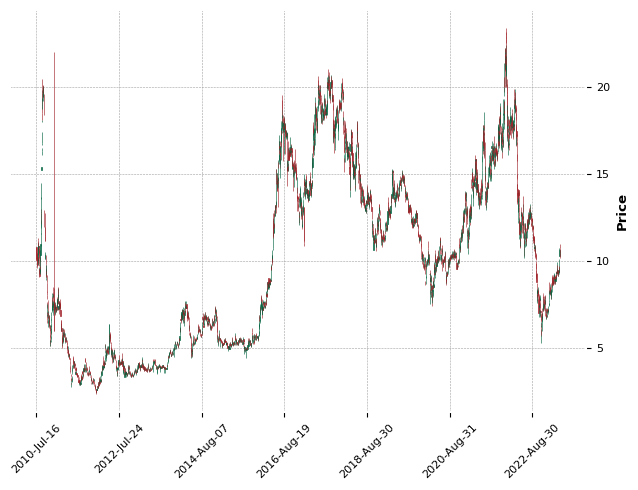

In [52]:
import mplfinance as mpf

# Get current date
current_date = datetime.now().strftime("%Y-%m-%d")

# Draw a candle stick price chart for Ticker == 'AAA', price range from 2023-01-01 to 2023-01-31
draw_chart = ticket_sample[(ticket_sample['Date'] >= '2000-01-01') & (ticket_sample['Date'] <= current_date)]

# Change sort by Date
draw_chart.sort_values(by=['Date'], inplace=True)

draw_chart.set_index('Date', inplace=True)

draw_chart['Open'] = draw_chart['Open'].astype(float)
draw_chart['High'] = draw_chart['High'].astype(float)
draw_chart['Low'] = draw_chart['Low'].astype(float)
draw_chart['Close'] = draw_chart['Close'].astype(float)
draw_chart['Volume'] = draw_chart['Volume'].astype(float)

# Create a new style for the chart
style = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})

# Plot the candlestick chart
mpf.plot(draw_chart, type='candle', style=style)


In [53]:
ticket_sample

,Ticker,Date,Open,High,Low,Close,Volume,DayOfWeek,DayOfMonth,Month,Year
0,AAA,2023-04-28,10.75,11,10.2,10.5,7.8449e+006,Friday,28.0,4.0,2023.0
1,AAA,2023-04-27,10.3,10.75,10.3,10.65,7.4791e+006,Thursday,27.0,4.0,2023.0
2,AAA,2023-04-26,9.42,10.15,9.4,10.15,1.26389e+007,Wednesday,26.0,4.0,2023.0
3,AAA,2023-04-25,9.57,9.67,9.37,9.49,1.8355e+006,Tuesday,25.0,4.0,2023.0
4,AAA,2023-04-24,9.59,9.7,9.47,9.58,1.7559e+006,Monday,24.0,4.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...
4970,AAA,2010-07-22,9.83184,10.464,9.81004,9.83184,147200,Thursday,22.0,7.0,2010.0
4971,AAA,2010-07-21,9.85364,9.89724,9.59204,9.83184,75800,Wednesday,21.0,7.0,2010.0
4972,AAA,2010-07-20,10.464,10.464,9.70104,9.85364,328700,Tuesday,20.0,7.0,2010.0
4973,AAA,2010-07-19,10.791,10.791,10.0934,10.0934,104900,Monday,19.0,7.0,2010.0


In [54]:
# ticket_sample['Year-Month'] = ticket_sample['Year'].astype(str) + '-' + ticket_sample['Month'].astype(str)


In [55]:

ticket_sample['Close'] = pd.to_numeric(ticket_sample['Close'], errors='coerce')
ticket_sample.dropna(subset=['Close'], inplace=True)


ticket_sample

/var/folders/dv/qwspr4sx6qjfkcywhq4tdqg00000gn/T/ipykernel_28062/2075460775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticket_sample['Close'] = pd.to_numeric(ticket_sample['Close'], errors='coerce')
/var/folders/dv/qwspr4sx6qjfkcywhq4tdqg00000gn/T/ipykernel_28062/2075460775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticket_sample.dropna(subset=['Close'], inplace=True)


,Ticker,Date,Open,High,Low,Close,Volume,DayOfWeek,DayOfMonth,Month,Year
0,AAA,2023-04-28,10.75,11,10.2,10.50000,7.8449e+006,Friday,28.0,4.0,2023.0
1,AAA,2023-04-27,10.3,10.75,10.3,10.65000,7.4791e+006,Thursday,27.0,4.0,2023.0
2,AAA,2023-04-26,9.42,10.15,9.4,10.15000,1.26389e+007,Wednesday,26.0,4.0,2023.0
3,AAA,2023-04-25,9.57,9.67,9.37,9.49000,1.8355e+006,Tuesday,25.0,4.0,2023.0
4,AAA,2023-04-24,9.59,9.7,9.47,9.58000,1.7559e+006,Monday,24.0,4.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...
4970,AAA,2010-07-22,9.83184,10.464,9.81004,9.83184,147200,Thursday,22.0,7.0,2010.0
4971,AAA,2010-07-21,9.85364,9.89724,9.59204,9.83184,75800,Wednesday,21.0,7.0,2010.0
4972,AAA,2010-07-20,10.464,10.464,9.70104,9.85364,328700,Tuesday,20.0,7.0,2010.0
4973,AAA,2010-07-19,10.791,10.791,10.0934,10.09340,104900,Monday,19.0,7.0,2010.0


In [56]:
import pandas as pd

# create a sample dataframe
data = {'City': ['London', 'London', 'Paris', 'Paris', 'New York', 'New York'],
        'Year': [2018, 2019, 2018, 2019, 2018, 2019],
        'Sales': [100, 200, 150, 250, 300, 400]}
df = pd.DataFrame(data)

# create a pivot table that shows the total sales by city and year
pivot_table = df.pivot_table(index='City', columns='Year', values='Sales', aggfunc='sum')

pivot_table


Year,2018,2019
City,,
London,100,200
New York,300,400
Paris,150,250


In [3]:
import pandas as pd


df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

: 

: 

In [2]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

ModuleNotFoundError: No module named 'rpy2'

In [ ]:
# Check for missing or zero values in Close column for Ticker AAA in 2018
mask = (ticket_sample['Ticker'] == 'AAA') & (ticket_sample['Year'] == 2018)
print(ticket_sample[mask]['Close'].isnull().sum())
print((ticket_sample[mask]['Close'] == 0).sum())


0
0
